### install library

In [1]:
!pip install duckdb

### import

In [2]:
import json
import pandas as pd
from IPython.display import display
import numpy as np
import duckdb

In [3]:
# prompt: 같은 경로의 ga_innercircle.csv 파일을 불러올 것
df = pd.read_csv('ga_innercircle.csv')
df
df.shape
df.head()

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,event_dimensions,ecommerce,items,collected_traffic_source,is_active_user,batch_event_index,batch_page_id,batch_ordering_id,session_traffic_source_last_click,publisher
0,20241113,1731423960541000,screen_view,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,1,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1,20241113,1731423963707001,scroll,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,2,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
2,20241113,1731423963707002,scroll,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,3,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
3,20241113,1731423963707003,scroll,"{\n ""event_params"": [{\n ""key"": ""percent_s...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,4,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
4,20241113,1731423964025004,scroll,"{\n ""event_params"": [{\n ""key"": ""firebase_...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,5,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"


### 데이터 확인

In [4]:
df.tail()

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,event_dimensions,ecommerce,items,collected_traffic_source,is_active_user,batch_event_index,batch_page_id,batch_ordering_id,session_traffic_source_last_click,publisher
1435,20241113,1731488942876023,sign_up_step_click,"{\n ""event_params"": [{\n ""key"": ""firebase_...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,24,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1436,20241113,1731488957721029,sign_up_step_click,"{\n ""event_params"": [{\n ""key"": ""engaged_s...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,30,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1437,20241113,1731488957753030,user_engagement,"{\n ""event_params"": [{\n ""key"": ""firebase_...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,31,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1438,20241113,1731488993165034,screen_view,"{\n ""event_params"": [{\n ""key"": ""engaged_s...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,35,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1439,20241113,1731489003965041,scroll,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",NaN,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,42,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   event_date                         1440 non-null   int64  
 1   event_timestamp                    1440 non-null   int64  
 2   event_name                         1440 non-null   object 
 3   event_params                       1440 non-null   object 
 4   event_previous_timestamp           1301 non-null   float64
 5   event_value_in_usd                 0 non-null      float64
 6   event_bundle_sequence_id           1440 non-null   int64  
 7   event_server_timestamp_offset      1440 non-null   int64  
 8   user_id                            834 non-null    float64
 9   user_pseudo_id                     1440 non-null   object 
 10  privacy_info                       1440 non-null   object 
 11  user_properties                    1440 non-null   objec

In [6]:
# prompt: 수치형데이터와 범주형데이터의 기초 기술통계 print 대신 display 사용

# Display the shape of the DataFrame
display(df.shape)

# Display the first few rows
display(df.head())

# Display the last few rows
display(df.tail())

# Display DataFrame information
display(df.info())

# Display descriptive statistics for numerical columns
display(df.describe())

# Display descriptive statistics for categorical columns
display(df.describe(include='object'))

(1440, 30)

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,event_dimensions,ecommerce,items,collected_traffic_source,is_active_user,batch_event_index,batch_page_id,batch_ordering_id,session_traffic_source_last_click,publisher
0,20241113,1731423960541000,screen_view,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,1,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1,20241113,1731423963707001,scroll,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,2,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
2,20241113,1731423963707002,scroll,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,3,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
3,20241113,1731423963707003,scroll,"{\n ""event_params"": [{\n ""key"": ""percent_s...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,4,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
4,20241113,1731423964025004,scroll,"{\n ""event_params"": [{\n ""key"": ""firebase_...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,5,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"


,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,event_dimensions,ecommerce,items,collected_traffic_source,is_active_user,batch_event_index,batch_page_id,batch_ordering_id,session_traffic_source_last_click,publisher
1435,20241113,1731488942876023,sign_up_step_click,"{\n ""event_params"": [{\n ""key"": ""firebase_...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,24,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1436,20241113,1731488957721029,sign_up_step_click,"{\n ""event_params"": [{\n ""key"": ""engaged_s...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,30,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1437,20241113,1731488957753030,user_engagement,"{\n ""event_params"": [{\n ""key"": ""firebase_...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,31,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1438,20241113,1731488993165034,screen_view,"{\n ""event_params"": [{\n ""key"": ""engaged_s...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,35,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1439,20241113,1731489003965041,scroll,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",NaN,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,42,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   event_date                         1440 non-null   int64  
 1   event_timestamp                    1440 non-null   int64  
 2   event_name                         1440 non-null   object 
 3   event_params                       1440 non-null   object 
 4   event_previous_timestamp           1301 non-null   float64
 5   event_value_in_usd                 0 non-null      float64
 6   event_bundle_sequence_id           1440 non-null   int64  
 7   event_server_timestamp_offset      1440 non-null   int64  
 8   user_id                            834 non-null    float64
 9   user_pseudo_id                     1440 non-null   object 
 10  privacy_info                       1440 non-null   object 
 11  user_properties                    1440 non-null   objec

None

,event_date,event_timestamp,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_first_touch_timestamp,stream_id,batch_event_index,batch_page_id,batch_ordering_id
count,1440.0,1.440000e+03,1.301000e+03,0.0,1440.000000,1.440000e+03,834.000000,1.440000e+03,1.440000e+03,1440.000000,0.0,0.0
mean,20241113.0,1.731477e+15,1.730924e+15,NaN,153.092361,6.993021e+05,115513.395683,1.725835e+15,2.330073e+09,11.627778,NaN,NaN
std,0.0,2.346659e+10,5.068038e+12,NaN,205.863487,5.300954e+06,38964.994957,1.793490e+13,1.288719e+04,13.098082,NaN,NaN
min,20241113.0,1.731424e+15,1.621842e+15,NaN,2.000000,1.090000e+02,19947.000000,1.614087e+15,2.330053e+09,1.000000,NaN,NaN
25%,20241113.0,1.731466e+15,1.731458e+15,NaN,7.000000,2.268280e+05,117468.000000,1.728823e+15,2.330053e+09,3.000000,NaN,NaN
50%,20241113.0,1.731484e+15,1.731479e+15,NaN,38.000000,2.991165e+05,136163.000000,1.731060e+15,2.330081e+09,6.000000,NaN,NaN
75%,20241113.0,1.731495e+15,1.731495e+15,NaN,468.000000,3.849370e+05,136163.000000,1.731466e+15,2.330081e+09,16.000000,NaN,NaN
max,20241113.0,1.731510e+15,1.731510e+15,NaN,523.000000,8.248770e+07,140171.000000,1.731509e+15,2.330081e+09,76.000000,NaN,NaN


,event_name,event_params,user_pseudo_id,privacy_info,user_properties,user_ltv,device,geo,app_info,traffic_source,platform,event_dimensions,ecommerce,items,collected_traffic_source,session_traffic_source_last_click,publisher
count,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440
unique,32,1440,103,1,932,2,83,31,5,6,2,1,2,8,2,7,1
top,screen_view,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",8AD0EDA3E1FF43669A39203848369A51,"{\n ""privacy_info"": {\n ""analytics_storage...","{\n ""user_properties"": [{\n ""key"": ""ga_ses...","{\n ""user_ltv"": null\n}","{\n ""device"": {\n ""category"": ""mobile"",\n ...","{\n ""geo"": {\n ""city"": ""Seoul"",\n ""coun...","{\n ""app_info"": {\n ""id"": ""com.fastcampus....","{\n ""traffic_source"": {\n ""name"": ""(direct...",IOS,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}","{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
freq,500,1,350,1440,23,1431,350,701,1026,1049,1026,1440,1433,1433,1438,1062,1440


### 각 변수 설명

- **event_date**: 이벤트 발생 날짜(YYYYMMDD 형식)로, 이벤트의 시간적 흐름 분석에 활용.  
- **event_timestamp**: 이벤트 발생 시점(유닉스 타임스탬프)으로, 세밀한 시간 분석 가능.  
- **event_name**: 이벤트 이름(예: 화면 보기, 스크롤)으로, 사용자 행동 유형을 나타냄.  
- **event_params**: 이벤트 관련 추가 매개변수(JSON 형식)로, 상세 정보 포함.  
- **event_previous_timestamp**: 이전 이벤트의 타임스탬프 차이로, 세션 흐름 분석에 유용.  
- **event_value_in_usd**: 이벤트의 금전적 가치(USD)로, 매출 또는 전환 가치 추적 가능(현재 결측).  
- **event_bundle_sequence_id**: 동일 세션 내 이벤트 순서를 나타내는 ID.  
- **event_server_timestamp_offset**: 서버와의 시간 차이를 나타내며, 동기화 분석에 활용 가능.  
- **user_id**: 사용자 고유 ID로, 사용자 식별 및 행동 추적 가능(일부 결측).  
- **user_pseudo_id**: 익명화된 사용자 ID로, 데이터 프라이버시를 준수하며 사용자 분석 가능.  
- **privacy_info**: 개인정보 보호 관련 정보로, 데이터 처리 규정 준수 여부 확인 가능.  
- **user_properties**: 사용자 속성(JSON 형식)으로, 사용자 특성 및 세분화에 활용 가능.  
- **user_first_touch_timestamp**: 사용자가 앱/웹과 처음 상호작용한 시점.  
- **user_ltv**: 사용자의 생애가치(Lifetime Value) 정보로, 고가치 사용자 분석에 활용.  
- **device**: 기기 정보(브랜드, 모델 등)로, 사용자 환경 분석에 활용.  
- **geo**: 사용자 위치 정보로, 지역별 행동 분석 가능.  
- **app_info**: 앱 관련 정보(버전 등)로, 기술적 요인 분석 가능.  
- **traffic_source**: 사용자 유입 경로(광고, 검색 등)로, 마케팅 성과 분석에 활용.  
- **stream_id**: 데이터 스트림 ID로, 특정 데이터 흐름을 구분.  
- **platform**: 사용 플랫폼(Android, iOS 등)으로, 플랫폼별 사용자 분석 가능.  
- **event_dimensions**: 이벤트의 추가 차원 정보(JSON 형식)로, 세부 분석 가능.  
- **ecommerce**: 전자상거래 관련 데이터로, 구매 행동 분석에 활용 가능.  
- **items**: 구매 또는 조회된 상품 정보(JSON 형식)로, 상품별 성과 분석 가능.  
- **collected_traffic_source**: 수집된 유입 경로 정보로, 마케팅 유입 데이터 보완.  
- **is_active_user**: 활성 사용자 여부(True/False)로, 사용자 참여도 분석 가능.  
- **batch_event_index**: 배치 내 이벤트 순서로, 이벤트 처리 순서 분석 가능.  
- **batch_page_id**: 배치된 페이지 ID(현재 결측)로, 페이지별 데이터 분석 가능.  
- **batch_ordering_id**: 배치 순서 ID(현재 결측)로, 이벤트 순서 관리에 활용 가능.  
- **session_traffic_source_last_click**: 세션 내 마지막 클릭 유입 경로 정보(JSON 형식).  
- **publisher**: 퍼블리셔 정보로, 광고 또는 콘텐츠 제공자 분석 가능.

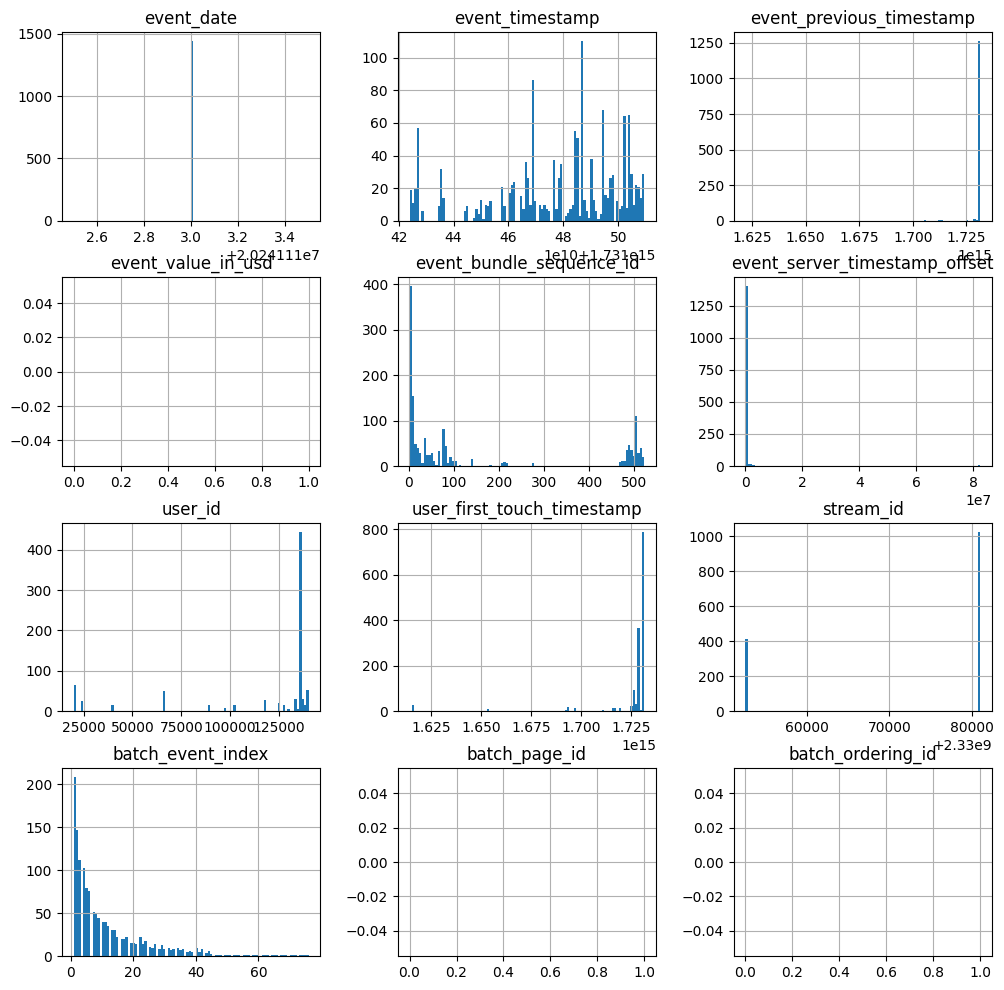

In [7]:
# 끝에 ';'을 붙여 중간 주석 제외 표시
df.hist(figsize=(12, 12),bins=100);

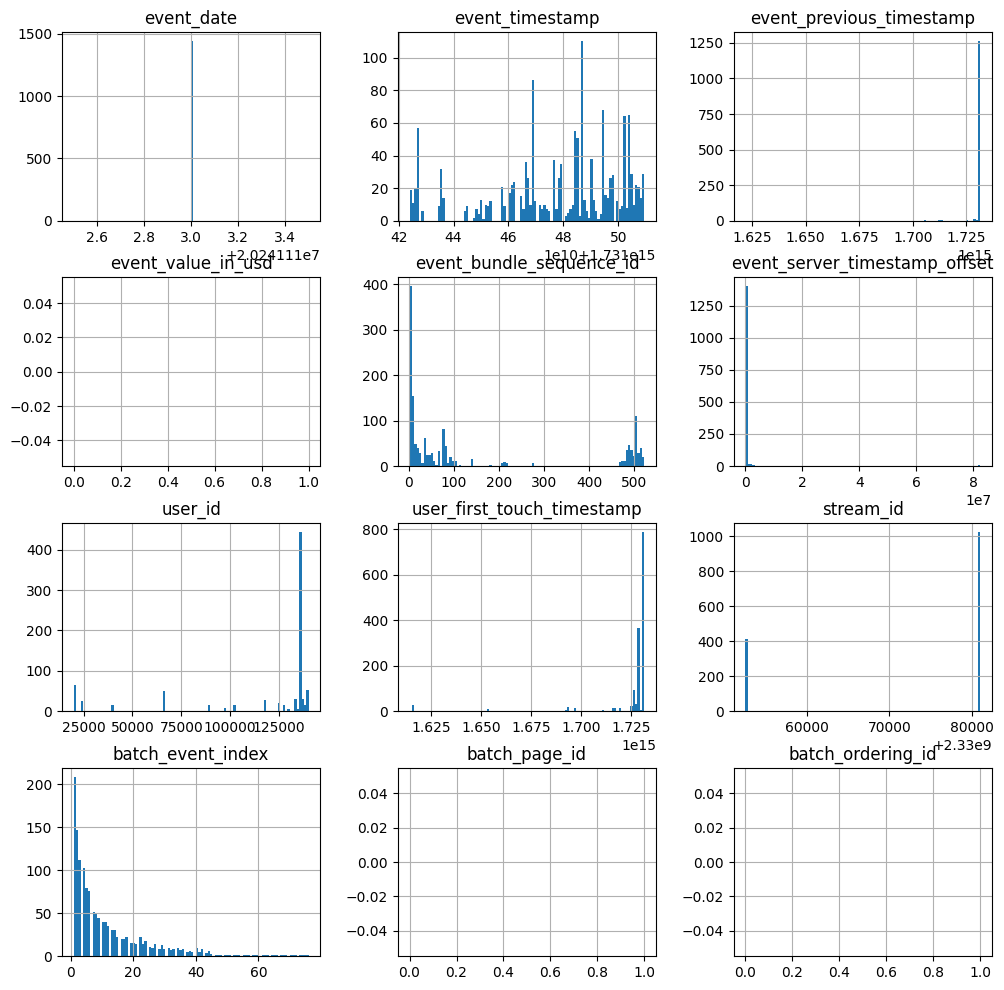

In [8]:
# prompt: 전체 수치변수에 대한 판다스를 활용해서 코드 한줄로 히스토그램 작성

df.select_dtypes(include=['number']).hist(figsize=(12, 12), bins=100);

In [9]:
df['event_name'].value_counts()

,count
event_name,
screen_view,500
user_engagement,386
sign_up_step_click,127
scroll,100
style_recommend_click,66
session_start,41
fnb_tab_click,38
main_content_click,37
eot_start_click,25


In [10]:
print(df.loc[0, 'event_params'])

{
  "event_params": [{
    "key": "ga_session_number",
    "value": {
      "string_value": null,
      "int_value": "171",
      "float_value": null,
      "double_value": null
    }
  }, {
    "key": "ga_session_id",
    "value": {
      "string_value": null,
      "int_value": "1731423503",
      "float_value": null,
      "double_value": null
    }
  }, {
    "key": "firebase_screen_class",
    "value": {
      "string_value": "MainActivity",
      "int_value": null,
      "float_value": null,
      "double_value": null
    }
  }, {
    "key": "firebase_event_origin",
    "value": {
      "string_value": "auto",
      "int_value": null,
      "float_value": null,
      "double_value": null
    }
  }, {
    "key": "firebase_screen_id",
    "value": {
      "string_value": null,
      "int_value": "-7731334501732282272",
      "float_value": null,
      "double_value": null
    }
  }]
}


### Func : JSON 데이터 파싱 및 저장 -> 실습용 (성공)

In [11]:
def parse_ga4_style_json(json_str):
    """
    1) JSON 문자열인 json_str을 파싱
    2) GA4 'key'/'value' 구조([{ "key": k, "value": {...}}])를 찾으면 -> {k: 실제값}으로 추출
    3) 일반 딕셔너리({ "some_key": some_val }) 구조도 최상위 key-value만 추출
    4) key-value를 담은 dict를 리턴 (실패 시 빈 dict)
    """
    # 예외처리: JSON 파싱
    try:
        parsed = json.loads(json_str)
    except:
        return {}

    # 결과를 담을 딕셔너리
    result = {}

    # 1) 리스트 형태(["event_params": [...]] 등) 안에서 GA4 style param 찾기
    if isinstance(parsed, dict):
        # 예: {"event_params": [{"key": "...", "value": {...}}, ...], "other_key": {...}}
        for top_key, top_val in parsed.items():

            # (A) 만약 리스트라면 → GA4 파라미터(또는 유사 구조) 가능성
            if isinstance(top_val, list):
                for item in top_val:
                    if isinstance(item, dict) and "key" in item and "value" in item:
                        # item: {"key": "...", "value": {...}}
                        param_key = item["key"]
                        param_val = item["value"]

                        # 실제 값 추출 (int_value, string_value, float_value, double_value 중 유효한 것)
                        if param_val.get("int_value") is not None:
                            val = int(param_val["int_value"])
                        elif param_val.get("string_value") is not None:
                            val = param_val["string_value"]
                        elif param_val.get("float_value") is not None:
                            val = float(param_val["float_value"])
                        elif param_val.get("double_value") is not None:
                            val = float(param_val["double_value"])
                        else:
                            val = None

                        result[param_key] = val

            # (B) 딕셔너리 형태라면(예: {"publisher": null}처럼 단일 key-value) → 최상위 키/값을 넣어줌
            elif isinstance(top_val, dict):
                # 간단히 top_val를 평탄화해서 result에 합침 (중첩은 추가 구현 필요)
                for inner_k, inner_v in top_val.items():
                    # key가 "key"이고 value가 {...} 이런 GA4 형식이 아닌 한, 그냥 key-value로 저장
                    result[f"{top_key}_{inner_k}"] = inner_v

            # (C) top_val이 숫자, 문자열, None 등 스칼라일 경우
            else:
                result[top_key] = top_val

    return result


def flatten_ga4_json_columns(df):
    """
    1) df 내에서 '{'로 시작하는 문자열이 있는 컬럼을 'JSON 컬럼'으로 판단
    2) 각 JSON 컬럼을 parse_ga4_style_json으로 변환 -> 여러 컬럼으로 펼침
    3) 펼쳐진 컬럼을 원본 df와 병합 후, 기존 JSON 컬럼은 삭제
    4) 최종 df 반환
    """
    json_cols = []

    # 1) 우선, '{'로 시작하는 문자열이 있는 컬럼 식별
    for col in df.columns:
        # Series를 문자열화한 뒤 '{'로 시작하는지(any) 확인
        if df[col].astype(str).str.startswith('{').any():
            json_cols.append(col)

    # 2) 각 JSON 컬럼별로 파싱 & 펼치기
    expanded_dfs = []
    for col in json_cols:
        # parse 결과 -> dict 형태가 row별로 생김
        parsed_series = df[col].astype(str).apply(parse_ga4_style_json)

        # dict -> 데이터프레임으로 (row별 컬럼 확장)
        expanded_df = pd.json_normalize(parsed_series)

        # 혹시 컬럼 충돌 방지를 위해 '원본컬럼명.새키' 형태로 명명
        expanded_df.columns = [f"{col}.{c}" for c in expanded_df.columns]

        expanded_dfs.append(expanded_df)

    # 3) 확장된 DF를 모두 수평 결합(concat) -> 원본 DF와 합치기
    if expanded_dfs:
        expanded_all = pd.concat([df] + expanded_dfs, axis=1)
    else:
        expanded_all = df.copy()

    # 4) 기존 JSON 컬럼은 삭제
    expanded_all.drop(columns=json_cols, inplace=True)

    return expanded_all

### Run : JSON 데이터 파싱 및 저장 -> 실습용 (성공)

In [12]:
df_flattened_success = flatten_ga4_json_columns(df)
print("=== Before ===")
display(df)
print("\n=== After Flattening ===")
display(df_flattened_success)

=== Before ===


,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,event_dimensions,ecommerce,items,collected_traffic_source,is_active_user,batch_event_index,batch_page_id,batch_ordering_id,session_traffic_source_last_click,publisher
0,20241113,1731423960541000,screen_view,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,1,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1,20241113,1731423963707001,scroll,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,2,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
2,20241113,1731423963707002,scroll,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,3,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
3,20241113,1731423963707003,scroll,"{\n ""event_params"": [{\n ""key"": ""percent_s...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,4,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
4,20241113,1731423964025004,scroll,"{\n ""event_params"": [{\n ""key"": ""firebase_...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,5,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,20241113,1731488942876023,sign_up_step_click,"{\n ""event_params"": [{\n ""key"": ""firebase_...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,24,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1436,20241113,1731488957721029,sign_up_step_click,"{\n ""event_params"": [{\n ""key"": ""engaged_s...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,30,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1437,20241113,1731488957753030,user_engagement,"{\n ""event_params"": [{\n ""key"": ""firebase_...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,31,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1438,20241113,1731488993165034,screen_view,"{\n ""event_params"": [{\n ""key"": ""engaged_s...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,35,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"



=== After Flattening ===


,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,...,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.creative_type,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.creative_type_id,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.creative_version,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.placement_id,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.placement_cost_structure,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.placement_name,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.rendering_id,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.site_id,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.site_name,publisher.publisher
0,20241113,1731423960541000,screen_view,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
1,20241113,1731423963707001,scroll,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
2,20241113,1731423963707002,scroll,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
3,20241113,1731423963707003,scroll,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
4,20241113,1731423964025004,scroll,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,20241113,1731488942876023,sign_up_step_click,1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,1731488838525000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
1436,20241113,1731488957721029,sign_up_step_click,1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,1731488838525000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
1437,20241113,1731488957753030,user_engagement,1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,1731488838525000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
1438,20241113,1731488993165034,screen_view,1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,1731488838525000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None


In [13]:
# prompt: 판다스의 데이터프레임 모든 컬럼 출력하기

# Display all columns of the DataFrame
pd.set_option("display.max_columns", None)  # Show all columns
display(df_flattened_success)

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,stream_id,platform,is_active_user,batch_event_index,batch_page_id,batch_ordering_id,event_params.ga_session_number,event_params.ga_session_id,event_params.firebase_screen_class,event_params.firebase_event_origin,event_params.firebase_screen_id,event_params.percent_scrolled,event_params.engagement_time_msec,event_params.entrances,event_params.firebase_conversion,event_params.channel,event_params.engaged_session_event,event_params.message_type,event_params.firebase_previous_class,event_params.firebase_screen,event_params.firebase_previous_id,event_params.session_engaged,event_params.tab_name,event_params.firebase_previous_screen,event_params.style_name,event_params.click_section,event_params.click_text,event_params.search_term,event_params.currency,event_params.platform,event_params.product_name,event_params.button_type,event_params.item_list_name,event_params.step,event_params.brand_name,event_params.withdrawal_reason,event_params.previous_app_version,event_params.previous_os_version,event_params.debug_event,event_params.campaign,event_params.source,event_params.campaign_info_source,event_params.error_value,event_params.firebase_error,event_params.dynamic_link_accept_time,event_params.dynamic_link_link_name,event_params.content_title,event_params.category,privacy_info.privacy_info_analytics_storage,privacy_info.privacy_info_ads_storage,privacy_info.privacy_info_uses_transient_token,user_properties.na_face_type,user_properties.na_gender,user_properties.na_body_type,user_properties.ga_session_id,user_properties.na_age,user_properties.na_shoulder,user_properties.ga_session_number,user_properties.na_bottom,user_properties.na_thigh,user_properties.na_middle,user_properties.na_job,user_properties.na_skin_type,user_properties.na_waist,user_properties.first_open_time,user_properties.na_top,user_properties.na_height,user_properties.na_weight,user_properties.color1_with_priority,user_properties.color2_with_priority,user_properties.eot_height,user_properties.color3_with_priority,user_properties._ltv_KRW,user_properties.height,user_properties.na_job_extra,user_ltv.user_ltv,user_ltv.user_ltv_revenue,user_ltv.user_ltv_currency,device.device_category,device.device_mobile_brand_name,device.device_mobile_model_name,device.device_mobile_marketing_name,device.device_mobile_os_hardware_model,device.device_operating_system,device.device_operating_system_version,device.device_vendor_id,device.device_advertising_id,device.device_language,device.device_is_limited_ad_tracking,device.device_time_zone_offset_seconds,device.device_browser,device.device_browser_version,device.device_web_info,geo.geo_city,geo.geo_country,geo.geo_continent,geo.geo_region,geo.geo_sub_continent,geo.geo_metro,app_info.app_info_id,app_info.app_info_version,app_info.app_info_install_store,app_info.app_info_firebase_app_id,app_info.app_info_install_source,traffic_source.traffic_source_name,traffic_source.traffic_source_medium,traffic_source.traffic_source_source,traffic_source.traffic_source,event_dimensions.event_dimensions,ecommerce.ecommerce,ecommerce.ecommerce_total_item_quantity,ecommerce.ecommerce_purchase_revenue_in_usd,ecommerce.ecommerce_purchase_revenue,ecommerce.ecommerce_refund_value_in_usd,ecommerce.ecommerce_refund_value,ecommerce.ecommerce_shipping_value_in_usd,ecommerce.ecommerce_shipping_value,ecommerce.ecommerce_tax_value_in_usd,ecommerce.ecommerce_tax_value,ecommerce.ecommerce_unique_items,ecommerce.ecommerce_transaction_id,collected_traffic_source.collected_traffic_source,collected_traffic_source.collected_traffic_source_manual_campaign_id,collected_traffic_source.collected_traffic_source_manual_campaign_name,collected_traffic_source.collected_traffic_source_manual_source,collected_traffic_source.collected_traffic_source_manual_medium,collected_traffic_source.collected_traffic

,event_date,event_timestamp,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_first_touch_timestamp,stream_id,batch_event_index,batch_page_id,batch_ordering_id,event_params.ga_session_number,event_params.ga_session_id,event_params.firebase_screen_id,event_params.engagement_time_msec,event_params.entrances,event_params.firebase_conversion,event_params.engaged_session_event,event_params.firebase_previous_id,event_params.session_engaged,event_params.debug_event,event_params.firebase_error,event_params.dynamic_link_accept_time,user_properties.ga_session_id,user_properties.ga_session_number,user_properties.first_open_time,user_properties._ltv_KRW,user_ltv.user_ltv,traffic_source.traffic_source,ecommerce.ecommerce,ecommerce.ecommerce_purchase_revenue_in_usd,ecommerce.ecommerce_purchase_revenue,ecommerce.ecommerce_refund_value_in_usd,ecommerce.ecommerce_refund_value,ecommerce.ecommerce_shipping_value_in_usd,ecommerce.ecommerce_shipping_value,ecommerce.ecommerce_tax_value_in_usd,ecommerce.ecommerce_tax_value,collected_traffic_source.collected_traffic_source,collected_traffic_source.collected_traffic_source_manual_campaign_id,collected_traffic_source.collected_traffic_source_manual_medium,collected_traffic_source.collected_traffic_source_manual_term,collected_traffic_source.collected_traffic_source_manual_content,collected_traffic_source.collected_traffic_source_manual_source_platform,collected_traffic_source.collected_traffic_source_manual_creative_format,collected_traffic_source.collected_traffic_source_manual_marketing_tactic,collected_traffic_source.collected_traffic_source_gclid,collected_traffic_source.collected_traffic_source_dclid,collected_traffic_source.collected_traffic_source_srsltid
count,1440.0,1.440000e+03,1.301000e+03,0.0,1440.000000,1.440000e+03,834.000000,1.440000e+03,1.440000e+03,1440.000000,0.0,0.0,1440.000000,1.440000e+03,1.416000e+03,5.180000e+02,38.0,32.0,1355.0,4.550000e+02,30.0,6.0,2.0,2.000000e+00,1.440000e+03,1440.000000,1.440000e+03,9.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,20241113.0,1.731477e+15,1.730924e+15,NaN,153.092361,6.993021e+05,115513.395683,1.725835e+15,2.330073e+09,11.627778,NaN,NaN,17.921528,1.731477e+09,7.355824e+17,2.458978e+04,1.0,1.0,1.0,9.402678e+17,1.0,1.0,4.0,1.731456e+12,1.731477e+09,17.921528,1.725946e+12,7.000000e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,2.346659e+10,5.068038e+12,NaN,205.863487,5.300954e+06,38964.994957,1.793490e+13,1.288719e+04,13.098082,NaN,NaN,28.863174,2.330574e+04,5.730685e+18,1.499667e+05,0.0,0.0,0.0,5.703207e+18,0.0,0.0,0.0,4.439920e+07,2.330574e+04,28.863174,1.790789e+10,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,20241113.0,1.731424e+15,1.621842e+15,NaN,2.000000,1.090000e+02,19947.000000,1.614087e+15,2.330053e+09,1.000000,NaN,NaN,1.000000,1.731424e+09,-9.166682e+18,1.000000e+00,1.0,1.0,1.0,-9.166682e+18,1.0,1.0,4.0,1.731425e+12,1.731424e+09,1.000000,1.614089e+12,7.000000e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,20241113.0,1.731466e+15,1.731458e+15,NaN,7.000000,2.268280e+05,117468.000000,1.728823e+15,2.330053e+09,3.000000,NaN,NaN,1.000000,1.731466e+09,-4.148081e+18,3.446250e+03,1.0,1.0,1.0,-3.648218e+18,1.0,1.0,4.0,1.731440e+12,1.731466e+09,1.000000,1.728824e+12,7.000000e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,20241113.0,1.731484e+15,1.731479e+15,NaN,38.000000,2.991165e+05,136163.000000,1.731060e+15,2.330081e+09,6.000000,NaN,NaN,3.000000,1.731484e+09,7.434553e+17,6.642000e+03,1.0,1.0,1.0,9.742391e+17,1.0,1.0,4.0,1.731456e+12,1.731484e+09,3.000000,1.731060e+12,7.000000e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,20241113.0,1.731495e+15,1.731495e+15,NaN,468.00000

,event_name,user_pseudo_id,platform,event_params.firebase_screen_class,event_params.firebase_event_origin,event_params.percent_scrolled,event_params.channel,event_params.message_type,event_params.firebase_previous_class,event_params.firebase_screen,event_params.tab_name,event_params.firebase_previous_screen,event_params.style_name,event_params.click_section,event_params.click_text,event_params.search_term,event_params.currency,event_params.platform,event_params.product_name,event_params.button_type,event_params.item_list_name,event_params.step,event_params.brand_name,event_params.withdrawal_reason,event_params.previous_app_version,event_params.previous_os_version,event_params.campaign,event_params.source,event_params.campaign_info_source,event_params.error_value,event_params.dynamic_link_link_name,event_params.content_title,event_params.category,privacy_info.privacy_info_analytics_storage,privacy_info.privacy_info_ads_storage,privacy_info.privacy_info_uses_transient_token,user_properties.na_face_type,user_properties.na_gender,user_properties.na_body_type,user_properties.na_age,user_properties.na_shoulder,user_properties.na_bottom,user_properties.na_thigh,user_properties.na_middle,user_properties.na_job,user_properties.na_skin_type,user_properties.na_waist,user_properties.na_top,user_properties.na_height,user_properties.na_weight,user_properties.color1_with_priority,user_properties.color2_with_priority,user_properties.eot_height,user_properties.color3_with_priority,user_properties.height,user_properties.na_job_extra,user_ltv.user_ltv_revenue,user_ltv.user_ltv_currency,device.device_category,device.device_mobile_brand_name,device.device_mobile_model_name,device.device_mobile_marketing_name,device.device_mobile_os_hardware_model,device.device_operating_system,device.device_operating_system_version,device.device_vendor_id,device.device_advertising_id,device.device_language,device.device_is_limited_ad_tracking,device.device_time_zone_offset_seconds,device.device_browser,device.device_browser_version,device.device_web_info,geo.geo_city,geo.geo_country,geo.geo_continent,geo.geo_region,geo.geo_sub_continent,geo.geo_metro,app_info.app_info_id,app_info.app_info_version,app_info.app_info_install_store,app_info.app_info_firebase_app_id,app_info.app_info_install_source,traffic_source.traffic_source_name,traffic_source.traffic_source_medium,traffic_source.traffic_source_source,event_dimensions.event_dimensions,ecommerce.ecommerce_total_item_quantity,ecommerce.ecommerce_unique_items,ecommerce.ecommerce_transaction_id,collected_traffic_source.collected_traffic_source_manual_campaign_name,collected_traffic_source.collected_traffic_source_manual_source,session_traffic_source_last_click.session_traffic_source_last_click_google_ads_campaign,session_traffic_source_last_click.session_traffic_source_last_click_sa360_campaign,session_traffic_source_last_click.session_traffic_source_last_click_dv360_campaign,session_traffic_source_last_click.session_traffic_source_last_click_manual_campaign.campaign_id,session_traffic_source_last_click.session_traffic_source_last_click_manual_campaign.campaign_name,session_traffic_source_last_click.session_traffic_source_last_click_manual_campaign.source,session_traffic_source_last_click.session_traffic_source_last_click_manual_campaign.medium,session_traffic_source_last_click.session_traffic_source_last_click_manual_campaign.term,session_traffic_source_last_click.session_traffic_source_last_click_manual_campaign.content,session_traffic_source_last_click.session_traffic_source_last_click_manual_campaign.source_platform,session_traffic_source_last_click.session_traffic_source_last_click_manual_campaign.creative_format,session_traffic_source_last_click.session_traffic_source_last_click_manual_campaign.marketing_tactic,session_traffic_source_last_click.session_traffic_source_last_click_cross_channel_campaign.campaign_id,session_traffic_source_last_click.session_traffic_source_last_click_cross_channel_campaign.campaign_na

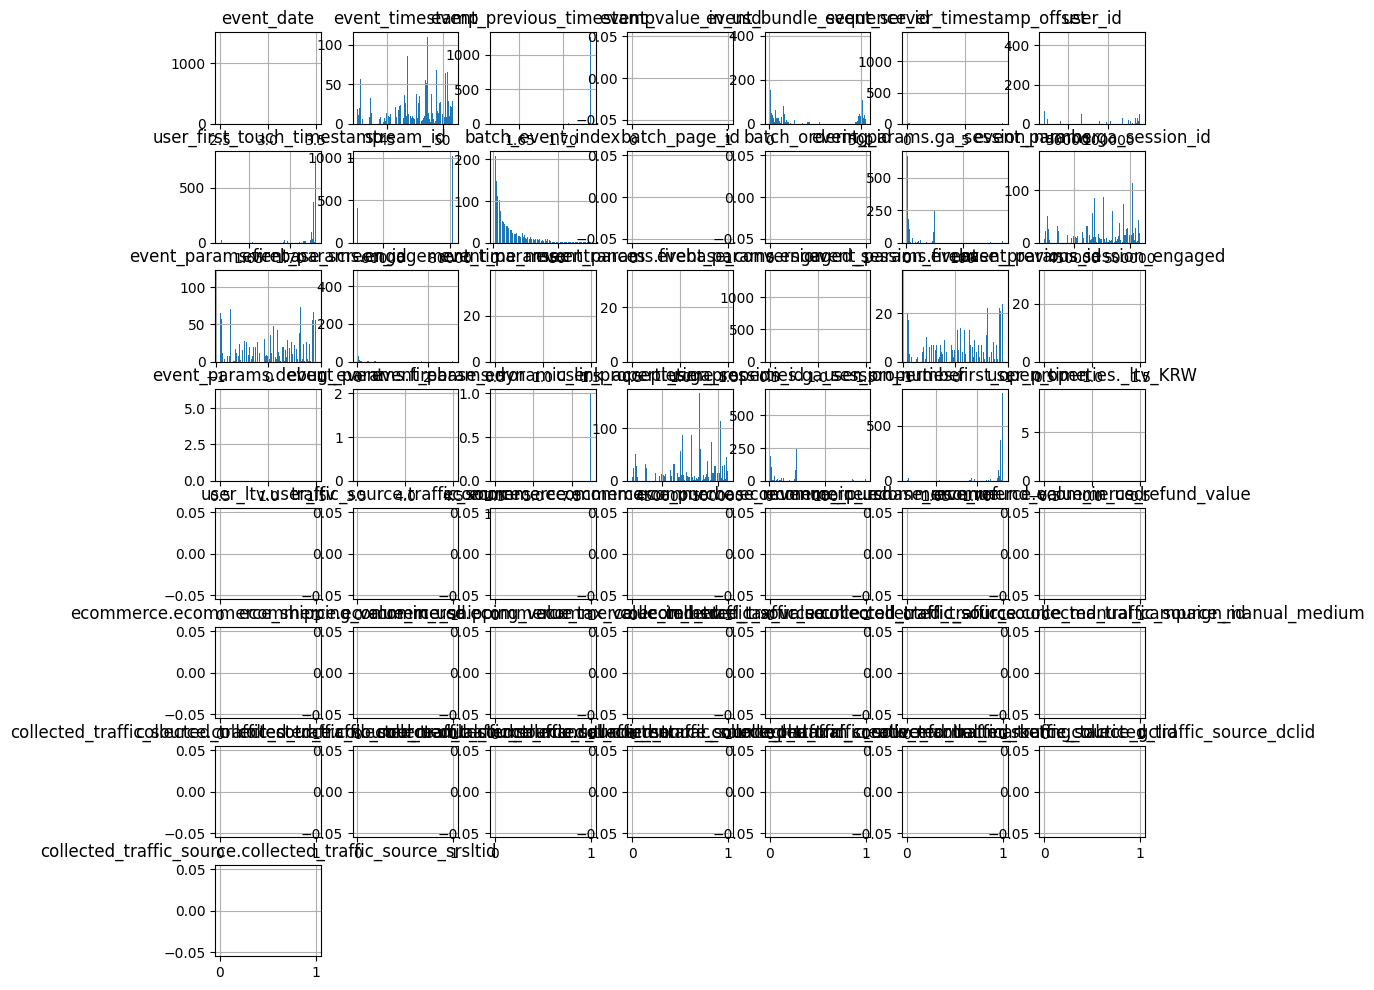

In [14]:
# prompt: 기초 기술 통계 작성

# Display descriptive statistics for numerical columns
display(df_flattened_success.describe())

# Display descriptive statistics for categorical columns
display(df_flattened_success.describe(include='object'))

# You can adjust the figsize and bins as needed
df_flattened_success.hist(figsize=(12, 12), bins=100);

In [15]:
display(df_flattened_success)

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,stream_id,platform,is_active_user,batch_event_index,batch_page_id,batch_ordering_id,event_params.ga_session_number,event_params.ga_session_id,event_params.firebase_screen_class,event_params.firebase_event_origin,event_params.firebase_screen_id,event_params.percent_scrolled,event_params.engagement_time_msec,event_params.entrances,event_params.firebase_conversion,event_params.channel,event_params.engaged_session_event,event_params.message_type,event_params.firebase_previous_class,event_params.firebase_screen,event_params.firebase_previous_id,event_params.session_engaged,event_params.tab_name,event_params.firebase_previous_screen,event_params.style_name,event_params.click_section,event_params.click_text,event_params.search_term,event_params.currency,event_params.platform,event_params.product_name,event_params.button_type,event_params.item_list_name,event_params.step,event_params.brand_name,event_params.withdrawal_reason,event_params.previous_app_version,event_params.previous_os_version,event_params.debug_event,event_params.campaign,event_params.source,event_params.campaign_info_source,event_params.error_value,event_params.firebase_error,event_params.dynamic_link_accept_time,event_params.dynamic_link_link_name,event_params.content_title,event_params.category,privacy_info.privacy_info_analytics_storage,privacy_info.privacy_info_ads_storage,privacy_info.privacy_info_uses_transient_token,user_properties.na_face_type,user_properties.na_gender,user_properties.na_body_type,user_properties.ga_session_id,user_properties.na_age,user_properties.na_shoulder,user_properties.ga_session_number,user_properties.na_bottom,user_properties.na_thigh,user_properties.na_middle,user_properties.na_job,user_properties.na_skin_type,user_properties.na_waist,user_properties.first_open_time,user_properties.na_top,user_properties.na_height,user_properties.na_weight,user_properties.color1_with_priority,user_properties.color2_with_priority,user_properties.eot_height,user_properties.color3_with_priority,user_properties._ltv_KRW,user_properties.height,user_properties.na_job_extra,user_ltv.user_ltv,user_ltv.user_ltv_revenue,user_ltv.user_ltv_currency,device.device_category,device.device_mobile_brand_name,device.device_mobile_model_name,device.device_mobile_marketing_name,device.device_mobile_os_hardware_model,device.device_operating_system,device.device_operating_system_version,device.device_vendor_id,device.device_advertising_id,device.device_language,device.device_is_limited_ad_tracking,device.device_time_zone_offset_seconds,device.device_browser,device.device_browser_version,device.device_web_info,geo.geo_city,geo.geo_country,geo.geo_continent,geo.geo_region,geo.geo_sub_continent,geo.geo_metro,app_info.app_info_id,app_info.app_info_version,app_info.app_info_install_store,app_info.app_info_firebase_app_id,app_info.app_info_install_source,traffic_source.traffic_source_name,traffic_source.traffic_source_medium,traffic_source.traffic_source_source,traffic_source.traffic_source,event_dimensions.event_dimensions,ecommerce.ecommerce,ecommerce.ecommerce_total_item_quantity,ecommerce.ecommerce_purchase_revenue_in_usd,ecommerce.ecommerce_purchase_revenue,ecommerce.ecommerce_refund_value_in_usd,ecommerce.ecommerce_refund_value,ecommerce.ecommerce_shipping_value_in_usd,ecommerce.ecommerce_shipping_value,ecommerce.ecommerce_tax_value_in_usd,ecommerce.ecommerce_tax_value,ecommerce.ecommerce_unique_items,ecommerce.ecommerce_transaction_id,collected_traffic_source.collected_traffic_source,collected_traffic_source.collected_traffic_source_manual_campaign_id,collected_traffic_source.collected_traffic_source_manual_campaign_name,collected_traffic_source.collected_traffic_source_manual_source,collected_traffic_source.collected_traffic_source_manual_medium,collected_traffic_source.collected_traffic

### Save : duckdb

In [18]:
con = duckdb.connect(database='ga_flattened.duckdb')

con.register('df_flattened', df_flattened_success)

con.execute("CREATE TABLE ga_innercircle AS SELECT * FROM df_flattened")

con.close()

### Save : to csv, excel

In [17]:
df_flattened_success.to_csv('ga_flattened.csv')

df_flattened_success.to_excel('ga_flattened.xlsx')

### Func : JSON 데이터 파싱 및 저장 -> 실패01

In [10]:
# prompt: 다음과 같이 df에 데이터가 있을 때 내부 데이터를 모르는 상태에서 { 로 시작하고 key value 로 되어 있는 모든 컬럼의 데이터를 파싱해서 새로운 컬럼으로 만들고 값을 적용해 주는 코드 작성 기존 컬럼은 삭제 할 것
#     event_date    event_timestamp    event_name    event_params    event_previous_timestamp    event_value_in_usd    event_bundle_sequence_id    event_server_timestamp_offset    user_id    user_pseudo_id    ...    event_dimensions    ecommerce    items    collected_traffic_source    is_active_user    batch_event_index    batch_page_id    batch_ordering_id    session_traffic_source_last_click    publisher
# 0    20241113    1731423960541000    screen_view    {\n "event_params": [{\n "key": "ga_sessio...    1.731424e+15    NaN    468    1115394    39827.0    154e3be9cecd0af9307e920fcc4f9476    ...    {\n "event_dimensions": null\n}    {\n "ecommerce": null\n}    {\n "items": []\n}    {\n "collected_traffic_source": null\n}    True    1    NaN    NaN    {\n "session_traffic_source_last_click": {\n ...    {\n "publisher": null\n}
# 1    20241113    1731423963707001    scroll    {\n "event_params": [{\n "key": "ga_sessio...    1.731424e+15    NaN    468    1115394    39827.0    154e3be9cecd0af9307e920fcc4f9476    ...    {\n "event_dimensions": null\n}    {\n "ecommerce": null\n}    {\n "items": []\n}    {\n "collected_traffic_source": null\n}    True    2    NaN    NaN    {\n "session_traffic_source_last_click": {\n ...    {\n "publisher": null\n}

def parse_json_columns(df):
    """
    Parses JSON-like columns in a DataFrame, creates new columns for key-value pairs,
    and removes the original JSON columns.

    Args:
        df: The input DataFrame.

    Returns:
        The modified DataFrame with parsed JSON data.
    """

    for col in df.columns:
        if df[col].dtype == 'object' and df[col].str.startswith('{').any():  # Check for '{' at the beginning
            try:
                # Attempt to parse the first valid JSON string
                first_valid_json = next((s for s in df[col] if isinstance(s, str) and s.startswith('{') and len(s) > 2 and '{' in s and '}' in s), None)
                if first_valid_json:
                    first_json = json.loads(first_valid_json)

                    for key in first_json: # Iterate over keys in the first valid json object.
                        new_col_name = f"{col}_{key}"

                        df[new_col_name] = df[col].apply(lambda x: json.loads(x).get(key) if isinstance(x, str) and x.startswith('{') and len(x) > 2 and '{' in x and '}' in x else None)

                    df.drop(columns=[col], inplace=True)

            except (json.JSONDecodeError, AttributeError):
                print(f"Warning: Could not parse JSON data in column '{col}'. Skipping this column.")

    return df

### Run : JSON 데이터 파싱 및 저장 -> 실패01

In [11]:
df_flattened_fail01 = parse_json_columns(df)
df_flattened_fail01

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,...,device_device,geo_geo,app_info_app_info,traffic_source_traffic_source,event_dimensions_event_dimensions,ecommerce_ecommerce,items_items,collected_traffic_source_collected_traffic_source,session_traffic_source_last_click_session_traffic_source_last_click,publisher_publisher
0,20241113,1731423960541000,screen_view,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,"{'category': 'mobile', 'mobile_brand_name': 'S...","{'city': 'Seoul', 'country': 'South Korea', 'c...","{'id': 'com.fastcampus.innercircle.bizeda', 'v...","{'name': None, 'medium': 'organic', 'source': ...",None,None,[],None,{'manual_campaign': {'campaign_id': '(not set)...,None
1,20241113,1731423963707001,scroll,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,"{'category': 'mobile', 'mobile_brand_name': 'S...","{'city': 'Seoul', 'country': 'South Korea', 'c...","{'id': 'com.fastcampus.innercircle.bizeda', 'v...","{'name': None, 'medium': 'organic', 'source': ...",None,None,[],None,{'manual_campaign': {'campaign_id': '(not set)...,None
2,20241113,1731423963707002,scroll,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,"{'category': 'mobile', 'mobile_brand_name': 'S...","{'city': 'Seoul', 'country': 'South Korea', 'c...","{'id': 'com.fastcampus.innercircle.bizeda', 'v...","{'name': None, 'medium': 'organic', 'source': ...",None,None,[],None,{'manual_campaign': {'campaign_id': '(not set)...,None
3,20241113,1731423963707003,scroll,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,"{'category': 'mobile', 'mobile_brand_name': 'S...","{'city': 'Seoul', 'country': 'South Korea', 'c...","{'id': 'com.fastcampus.innercircle.bizeda', 'v...","{'name': None, 'medium': 'organic', 'source': ...",None,None,[],None,{'manual_campaign': {'campaign_id': '(not set)...,None
4,20241113,1731423964025004,scroll,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,"{'category': 'mobile', 'mobile_brand_name': 'S...","{'city': 'Seoul', 'country': 'South Korea', 'c...","{'id': 'com.fastcampus.innercircle.bizeda', 'v...","{'name': None, 'medium': 'organic', 'source': ...",None,None,[],None,{'manual_campaign': {'campaign_id': '(not set)...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,20241113,1731488942876023,sign_up_step_click,1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,1731488838525000,...,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'city': 'Daegu', 'country': 'South Korea', 'c...","{'id': 'com.fastcampus.innercircle.bizeda', 'v...","{'name': '(direct)', 'medium': '(none)', 'sour...",None,None,[],None,{'manual_campaign': {'campaign_id': '(not set)...,None
1436,20241113,1731488957721029,sign_up_step_click,1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,1731488838525000,...,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'city': 'Daegu', 'country': 'South Korea', 'c...","{'id': 'com.fastcampus.innercircle.bizeda', 'v...","{'name': '(direct)', 'medium': '(none)', 'sour...",None,None,[],None,{'manual_campaign': {'campaign_id': '(not set)...,None
1437,20241113,1731488957753030,user_engagement,1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,1731488838525000,...,"{'category': 'mobile', 'mobile_brand_name': 'A...","{'city': 'Daegu', 'country': 'South Korea', 'c...","{'id': 'com.fastcampus.innercircle.bizeda', 'v...","{'name': '(direct)', 'medium': '(none)', 'sour...",None,None,[],None,{'manual_campaign': {'campaign_id': '(not set)...,None
1438,20241113,1731488993165034,screen_view,1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,1731488838525000,...,"{'category': 'mobile', 'mobile_brand

### Func : JSON 데이터 파싱 및 저장 -> 실패02

In [21]:
df.head()

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,privacy_info,user_properties,user_first_touch_timestamp,user_ltv,device,geo,app_info,traffic_source,stream_id,platform,event_dimensions,ecommerce,items,collected_traffic_source,is_active_user,batch_event_index,batch_page_id,batch_ordering_id,session_traffic_source_last_click,publisher
0,20241113,1731423960541000,screen_view,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,"{\n ""privacy_info"": {\n ""analytics_storage...","{\n ""user_properties"": [{\n ""key"": ""na_fac...",1717068513956000,"{\n ""user_ltv"": null\n}","{\n ""device"": {\n ""category"": ""mobile"",\n ...","{\n ""geo"": {\n ""city"": ""Seoul"",\n ""coun...","{\n ""app_info"": {\n ""id"": ""com.fastcampus....","{\n ""traffic_source"": {\n ""name"": null,\n ...",2330052538,ANDROID,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,1,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1,20241113,1731423963707001,scroll,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,"{\n ""privacy_info"": {\n ""analytics_storage...","{\n ""user_properties"": [{\n ""key"": ""na_job...",1717068513956000,"{\n ""user_ltv"": null\n}","{\n ""device"": {\n ""category"": ""mobile"",\n ...","{\n ""geo"": {\n ""city"": ""Seoul"",\n ""coun...","{\n ""app_info"": {\n ""id"": ""com.fastcampus....","{\n ""traffic_source"": {\n ""name"": null,\n ...",2330052538,ANDROID,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,2,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
2,20241113,1731423963707002,scroll,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,"{\n ""privacy_info"": {\n ""analytics_storage...","{\n ""user_properties"": [{\n ""key"": ""ga_ses...",1717068513956000,"{\n ""user_ltv"": null\n}","{\n ""device"": {\n ""category"": ""mobile"",\n ...","{\n ""geo"": {\n ""city"": ""Seoul"",\n ""coun...","{\n ""app_info"": {\n ""id"": ""com.fastcampus....","{\n ""traffic_source"": {\n ""name"": null,\n ...",2330052538,ANDROID,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,3,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
3,20241113,1731423963707003,scroll,"{\n ""event_params"": [{\n ""key"": ""percent_s...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,"{\n ""privacy_info"": {\n ""analytics_storage...","{\n ""user_properties"": [{\n ""key"": ""na_top...",1717068513956000,"{\n ""user_ltv"": null\n}","{\n ""device"": {\n ""category"": ""mobile"",\n ...","{\n ""geo"": {\n ""city"": ""Seoul"",\n ""coun...","{\n ""app_info"": {\n ""id"": ""com.fastcampus....","{\n ""traffic_source"": {\n ""name"": null,\n ...",2330052538,ANDROID,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,4,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
4,20241113,1731423964025004,scroll,"{\n ""event_params"": [{\n ""key"": ""firebase_...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,"{\n ""privacy_info"": {\n ""analytics_storage...","{\n ""user_properties"": [{\n ""key"": ""na_hei...",1717068513956000,"{\n ""user_ltv"": null\n}","{\n ""device"": {\n ""category"": ""mobile"",\n ...","{\n ""geo"": {\n ""city"": ""Seoul"",\n ""coun...","{\n ""app_info"": {\n ""id"": ""com.fastcampus....","{\n 

In [22]:
def parse_json_columns(df):
    # DataFrame의 모든 컬럼을 순회
    columns_to_drop = []

    for column in df.columns:
        # 첫 번째 non-null 값을 가져옴
        sample_value = df[column].dropna().iloc[0] if not df[column].empty else None

        # 문자열이고 '{'로 시작하는지 확인
        if isinstance(sample_value, str) and sample_value.strip().startswith('{'):
            try:
                # JSON 파싱 시도
                parsed_series = df[column].apply(lambda x: json.loads(x) if pd.notna(x) else {})

                # 파싱된 데이터에서 모든 키를 추출
                all_keys = set()
                parsed_series.apply(lambda x: all_keys.update(x.keys()))

                # 각 키에 대해 새로운 컬럼 생성
                for key in all_keys:
                    new_column_name = f"{column}_{key}"
                    df[new_column_name] = parsed_series.apply(lambda x: x.get(key))

                # 원본 컬럼을 삭제 목록에 추가
                columns_to_drop.append(column)

            except json.JSONDecodeError:
                continue

    # 원본 컬럼들 삭제
    df.drop(columns=columns_to_drop, inplace=True)

    return df

### RUN : JSON 데이터 파싱 및 저장 -> 실패02

In [23]:
df_flattened_fail02 = parse_json_columns(df)
df_flattened_fail02.info()

IndexError: single positional indexer is out-of-bounds